## 2. Regression Analysis on Weather & Coordinates

### Loading data file

In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import time
# Load output file
city_data_to_load = "data/cities.csv"
city_data_df = pd.read_csv(city_data_to_load)
# city_data_df = city_data_df.set_index(['City_ID'])
city_data_df.head()

,City_ID,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Current Description
0,0,Bambous Virieux,MU,2021-08-27 22:08:43,-20.3428,57.7575,71.22,90,95,22.97,light rain
1,1,Khatanga,RU,2021-08-27 22:08:44,71.9667,102.5000,35.96,96,100,22.30,moderate rain
2,2,Hobart,AU,2021-08-27 22:08:44,-42.8794,147.3294,44.11,97,75,3.00,broken clouds
3,3,Ati,TD,2021-08-27 22:08:45,13.2154,18.3353,88.47,48,37,4.25,scattered clouds
4,4,Vaini,TO,2021-08-27 22:08:45,-21.2000,-175.2000,69.96,78,40,8.05,scattered clouds


In [2]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [3]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.strftime("%x")
today

'08/30/21'

### Scatter Plots of City Latitude vs Weather parameters

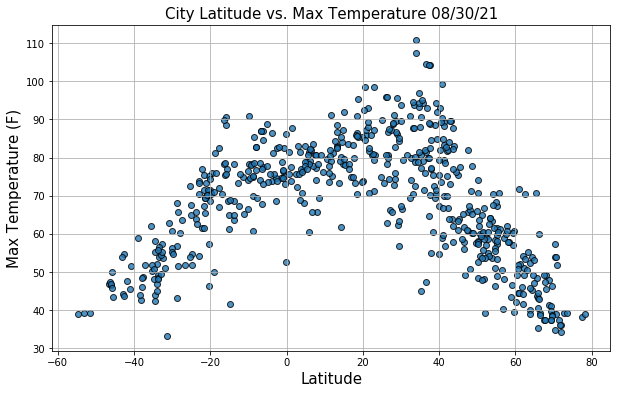

In [4]:
# Build the scatter plot for latitude vs. max temperature
plt.subplots(figsize = (10,6))
plt.scatter(lats,
            max_temps,
            edgecolor='black', linewidth=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other properties. 
plt.title(f"City Latitude vs. Max Temperature " + time.strftime("%x"), fontsize=15)
plt.ylabel("Max Temperature (F)", fontsize=15)
plt.yticks(np.arange(30,111, step=10.0))
plt.xlabel("Latitude", fontsize = 15)
plt.grid(True)

# Sae the fugure
plt.savefig("../image/CityLatitudenTemp.png")

#Show plot
plt.show()

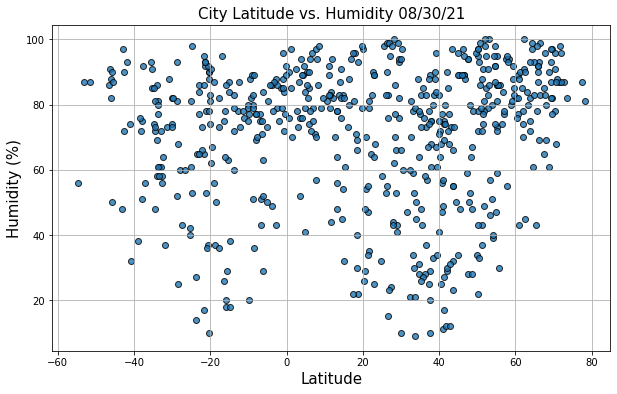

In [5]:
# Build the scatter plot for latitude vs. humidity
plt.subplots(figsize = (10,6))
plt.scatter(lats,
            humidity,
            edgecolor='black', linewidth=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other properties. 
plt.title(f"City Latitude vs. Humidity " + time.strftime("%x"), fontsize=15)
plt.ylabel("Humidity (%)", fontsize=15)
plt.xlabel("Latitude", fontsize = 15)
plt.grid(True)

# Sae the fugure
plt.savefig("../image/CityLatitudenHumidity.png")

#Show plot
plt.show()

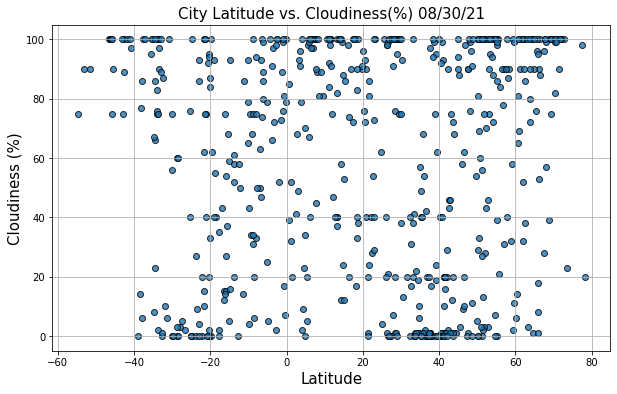

In [6]:
# Build the scatter plot for latitude vs. cloudiness
plt.subplots(figsize = (10,6))
plt.scatter(lats,
            cloudiness,
            edgecolor='black', linewidth=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other properties. 
plt.title(f"City Latitude vs. Cloudiness(%) " + time.strftime("%x"), fontsize=15)
plt.ylabel("Cloudiness (%)", fontsize=15)
plt.xlabel("Latitude", fontsize = 15)
plt.grid(True)

# Sae the fugure
plt.savefig("../image/CityLatitudenCloud.png")

#Show plot
plt.show()

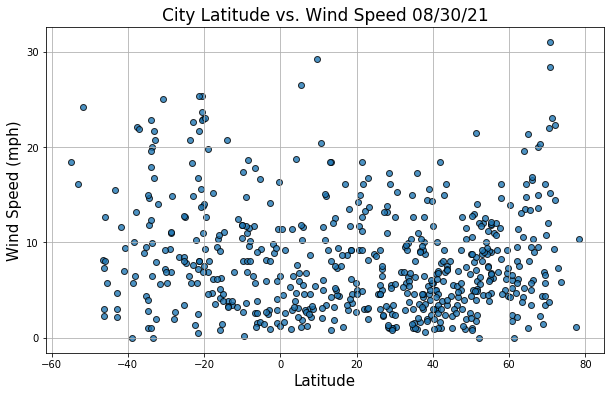

In [7]:
# Build the scatter plot for latitude vs.Wind Speed
plt.subplots(figsize = (10,6))
plt.scatter(lats,
            wind_speed,
            edgecolor='black', linewidth=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other properties. 
plt.title(f"City Latitude vs. Wind Speed " + time.strftime("%x"), fontsize = 17)
plt.ylabel("Wind Speed (mph)" , fontsize=15)
plt.xlabel("Latitude" , fontsize=15)
plt.yticks(np.arange(0,40,step=10.0))
plt.grid(True)

# Save the fugure
plt.savefig("../image/CityLatitudenWindSpeed.png")

#Show plot
plt.show()

### Linear Regression plots of Northern/Southern Hemishere

In [8]:
 from scipy.stats import linregress

In [21]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.  
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.subplots(figsize = (10,6))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude', fontsize=15)
    plt.ylabel(y_label, fontsize=15)
    plt.title(title, fontsize=17)
    plt.show()

In [22]:
# Create Northern and Southern Hemisphere DataFrames
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0 )]

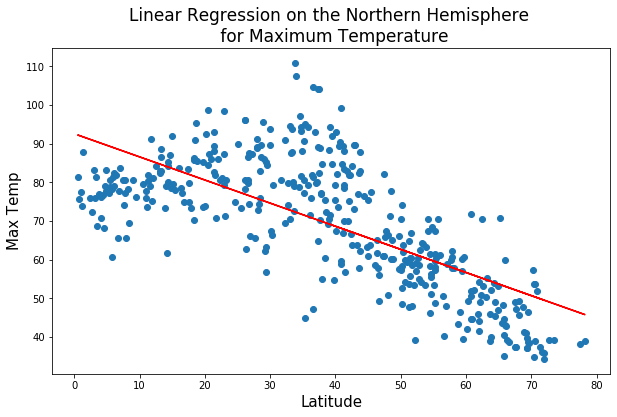

<Figure size 432x288 with 0 Axes>

In [23]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Maximum Temperature', 
                       'Max Temp',(5,30))
# Save the fugure
plt.savefig("../image/RegressionTempNorth.png")

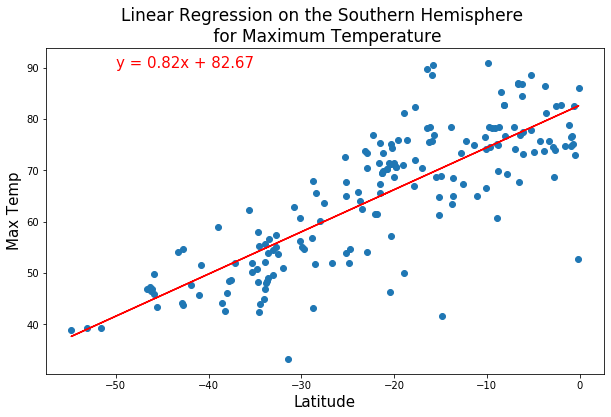

<Figure size 432x288 with 0 Axes>

In [24]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 
                       'Max Temp',(-50,90))
# Save the fugure
plt.savefig("../image/RegressionTempSouth.png")

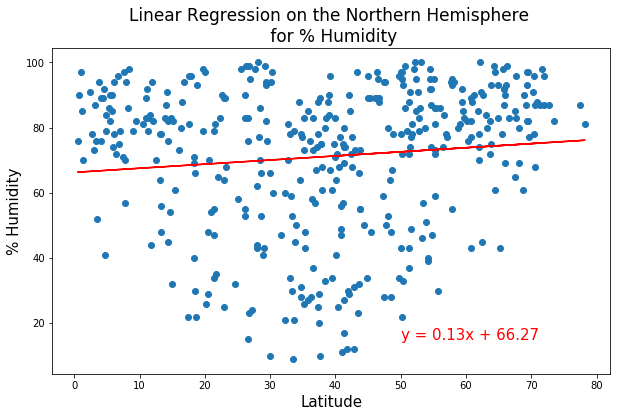

<Figure size 432x288 with 0 Axes>

In [25]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Humidity', 
                       '% Humidity',(50,15))
# Save the fugure
plt.savefig("../image/RegressionHumNorth.png")

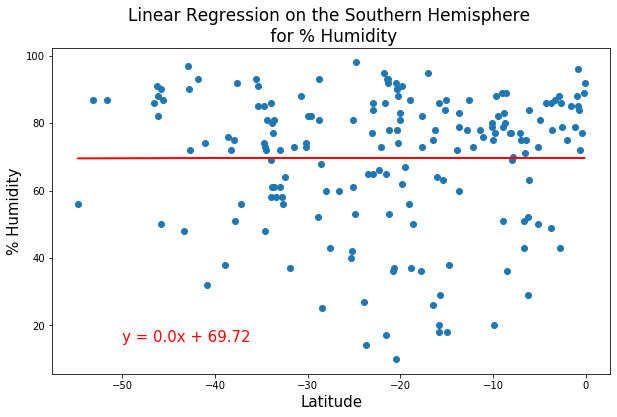

<Figure size 432x288 with 0 Axes>

In [26]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Humidity', 
                       '% Humidity',(-50,15))
# Save the fugure
plt.savefig("../image/RegressionHumSouth.png")

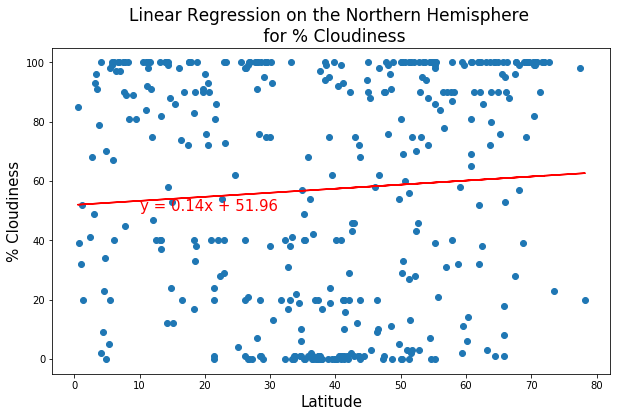

<Figure size 432x288 with 0 Axes>

In [27]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression : \n the Northern Hemisphere \n for % Cloudiness', 
                       '% Cloudiness',(10,50))
# Save the fugure
plt.savefig("../image/RegressionCloudNorth.png")

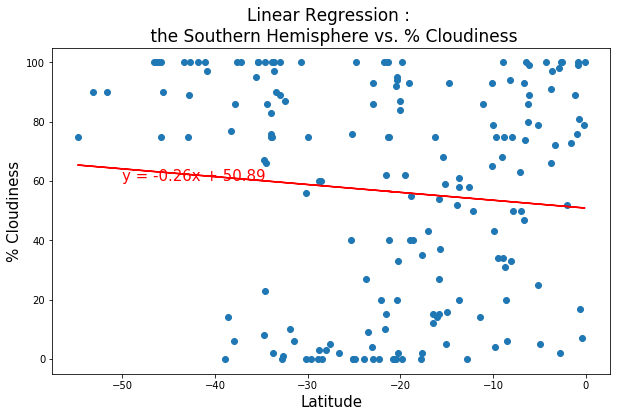

<Figure size 432x288 with 0 Axes>

In [36]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression : \n the Southern Hemisphere vs. % Cloudiness', 
                       '% Cloudiness',(-50,60))
# Save the fugure
plt.savefig("../image/RegressionCloudSouth.png")

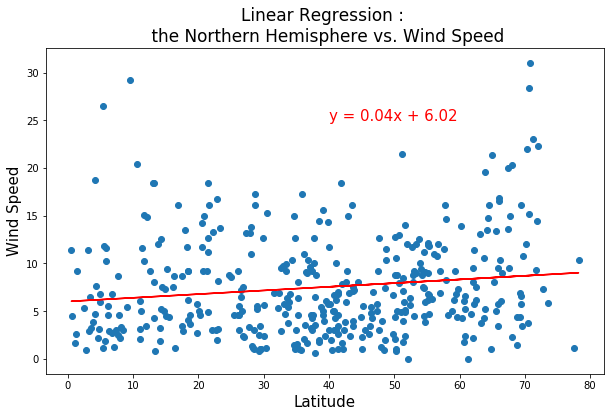

<Figure size 432x288 with 0 Axes>

In [34]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression : \n the Northern Hemisphere vs. Wind Speed', 
                       'Wind Speed',(40,25))
# Save the fugure
plt.savefig("../image/RegressionWindNorth.png")

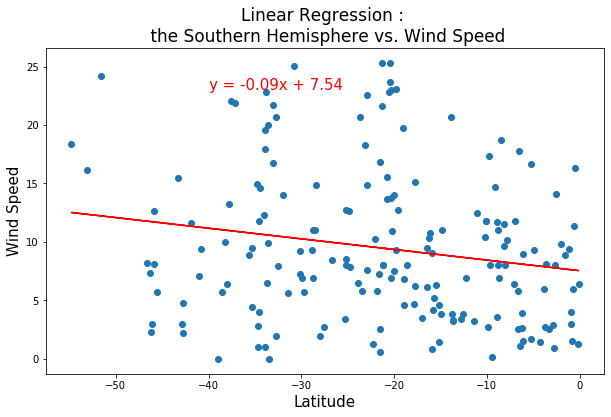

<Figure size 432x288 with 0 Axes>

In [35]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression : \n the Southern Hemisphere vs. Wind Speed', 
                       'Wind Speed',(-40,23))
# Save the fugure
plt.savefig("../image/RegressionWindSouth.png")

### The correlation table of Latitude and Weather factors

In [31]:
# Create correlation table of Weather factors (Northen Hemisphere)
north_weather_data_df=city_data_df.loc[city_data_df["Lat"] >= 0,["Max Temp","Humidity","Cloudiness","Wind Speed"]]
north_weather_corr = north_weather_data_df.corr()
north_weather_corr.head()

,Max Temp,Humidity,Cloudiness,Wind Speed
Max Temp,1.000000,-0.480244,-0.291637,-0.079335
Humidity,-0.480244,1.000000,0.370247,-0.052697
Cloudiness,-0.291637,0.370247,1.000000,0.086294
Wind Speed,-0.079335,-0.052697,0.086294,1.000000


In [32]:
# Create correlation table of Weather factors (Southern Hemisphere)
south_weather_data_df=city_data_df.loc[city_data_df["Lat"] < 0,["Max Temp","Humidity","Cloudiness","Wind Speed"]]
south_weather_corr = south_weather_data_df.corr()
south_weather_corr.head()

,Max Temp,Humidity,Cloudiness,Wind Speed
Max Temp,1.000000,-0.140677,-0.123993,-0.151223
Humidity,-0.140677,1.000000,0.349442,0.008418
Cloudiness,-0.123993,0.349442,1.000000,0.108775
Wind Speed,-0.151223,0.008418,0.108775,1.000000
